### TEAM E3 LETTER PREDICTION
###  B Sai Abhishek
###  B Ruchith balaji
###  Chillakuru Hari

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,precision_score,classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [2]:
df = pd.read_csv("letter_recognition.csv")

In [3]:
df.head(10)


,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
5,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
6,B,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10
7,A,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
8,J,2,2,4,4,2,10,6,2,6,12,4,8,1,6,1,7
9,M,11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8


In [4]:
print("shape :",df.shape)
print(df.info())

shape : (20000, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB
None


In [5]:
df.corr()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
xbox,1.000000,0.757793,0.851514,0.672764,0.619097,-0.032595,0.045545,0.014306,0.052086,0.148056,0.035464,-0.046333,0.489155,0.098180,0.273504,-0.105147
ybox,0.757793,1.000000,0.671912,0.823207,0.555067,0.045690,-0.040925,-0.025019,0.096478,0.159954,-0.054648,-0.007568,0.274431,-0.001336,0.230883,-0.042741
width,0.851514,0.671912,1.000000,0.660215,0.765716,0.061959,0.024832,-0.098611,0.057074,0.115018,0.011694,-0.045009,0.557251,0.045658,0.260285,-0.118273
height,0.672764,0.823207,0.660215,1.000000,0.644366,0.042844,-0.020072,0.082383,0.059032,0.012458,-0.011991,0.026386,0.265243,0.025359,0.297545,-0.018853
onpix,0.619097,0.555067,0.765716,0.644366,1.000000,0.139159,-0.028822,-0.011985,-0.065557,-0.069776,-0.072941,-0.038858,0.627507,0.017649,0.492653,-0.062969
xbar,-0.032595,0.045690,0.061959,0.042844,0.139159,1.000000,-0.356580,-0.053306,-0.122851,0.085963,-0.341957,-0.032115,0.144325,-0.253339,0.127056,0.248816
ybar,0.045545,-0.040925,0.024832,-0.020072,-0.028822,-0.356580,1.000000,-0.118625,-0.049658,0.178318,0.600397,-0.271649,-0.036722,0.555060,-0.078008,-0.207900
x2bar,0.014306,-0.025019,-0.098611,0.082383,-0.011985,-0.053306,-0.118625,1.000000,-0.188431,-0.317780,0.042545,0.082020,0.142132,-0.084820,0.006546,0.182902
y2bar,0.052086,0.096478,0.057074,0.059032,-0.065557,-0.122851,-0.049658,-0.188431,1.000000,0.132000,-0.060116,0.119048,-0.384018,-0.052545,0.277540,-0.061335
xybar,0.148056,0.159954,0.115018,0.012458,-0.069776,0.085963,0.178318,-0.317780,0.132000,1.000000,0.057988,-0.106759,-0.175676,0.029419,-0.087019,-0.114223


In [6]:
x=df.drop(['letter'], axis=1)
x

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [7]:
y=df.letter
y

0        T
1        I
2        D
3        N
4        G
        ..
19995    D
19996    C
19997    T
19998    S
19999    A
Name: letter, Length: 20000, dtype: object

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 1)

### KNN


In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 1)
st_x = StandardScaler()
x_train2 = st_x.fit_transform(x_train)
x_test2 = st_x.fit_transform(x_test)
knn = KNeighborsClassifier(n_neighbors = 5,metric = 'euclidean',p=2)
knn.fit(x_train2,y_train)
y_predict = knn.predict(x_test2)
print("Confusion Matrix")
print(confusion_matrix(y_test,y_predict))
k11 = accuracy_score(y_test,y_predict)*100
k22 = recall_score(y_test,y_predict,average = 'macro')*100
k33 = precision_score(y_test,y_predict,average='macro')*100
k44 = f1_score(y_test,y_predict,average='macro')*100


Confusion Matrix
[[160   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0
    0   0   0   0   0   0   1   0]
 [  0 146   0   1   0   0   0   1   0   1   0   0   0   0   0   0   0   2
    0   0   0   0   0   1   0   0]
 [  0   0 139   0   2   0   1   0   0   0   0   1   0   0   1   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   4   0 150   0   0   0   2   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   1   0   0 136   0   1   0   0   0   0   1   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   1 134   0   0   0   0   0   0   0   0   0   4   0   1
    0   4   0   0   0   0   0   0]
 [  0   2   1   1   0   0 147   0   0   0   0   0   1   0   1   0   0   0
    1   0   0   0   0   0   0   0]
 [  0   3   0   3   1   0   1 126   0   0   6   0   0   1   1   0   0   3
    0   0   1   0   0   0   0   0]
 [  0   0   1   0   0   0   0   0 132   4   0   0   0   0   0   0   0   0
    0   0   0   0   0   1   0   0]
 [

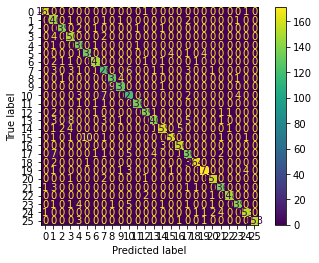

In [10]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test,y_predict))
cm_display.plot()
plt.show()

In [11]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           A       0.99      0.99      0.99       162
           B       0.82      0.96      0.89       152
           C       0.97      0.97      0.97       144
           D       0.88      0.96      0.92       156
           E       0.90      0.98      0.94       139
           F       0.92      0.93      0.93       144
           G       0.96      0.95      0.96       154
           H       0.88      0.86      0.87       146
           I       0.93      0.96      0.94       138
           J       0.95      0.93      0.94       141
           K       0.86      0.88      0.87       137
           L       0.99      0.98      0.98       139
           M       0.97      0.96      0.96       145
           N       0.95      0.87      0.91       161
           O       0.95      0.92      0.94       173
           P       0.97      0.91      0.94       174
           Q       0.96      0.98      0.97       159
           R       0.88    

In [12]:
print("Accuracy :",k11)
print("Recall:",k22)
print("Precision_Score:",k33)
print("F1_Score:",k44)

Accuracy : 94.19999999999999
Recall: 94.21182141436432
Precision_Score: 94.22430413161833
F1_Score: 94.1653879389048


In [13]:
predicted= knn.predict([[2,8,3,5,1,8,0,0,6,6,10,8,0,8,0,9]])
print(predicted)
predicted1= knn.predict([[2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8]])
print(predicted1)

['L']
['Q']


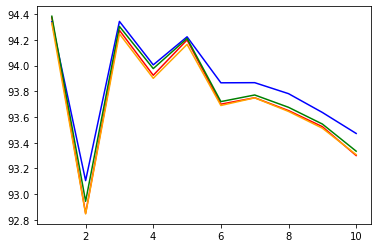

In [14]:
a = []
p = []
r = []
f = []
xc =[1,2,3,4,5,6,7,8,9,10]
for i in range(1,11):
    st_x = StandardScaler()
    x_train2 = st_x.fit_transform(x_train)
    x_test2 = st_x.fit_transform(x_test)
    knn = KNeighborsClassifier(n_neighbors = i,metric = 'euclidean',p=2)
    knn.fit(x_train2,y_train)
    y_predict = knn.predict(x_test2)
    k1 = accuracy_score(y_test,y_predict)*100
    k2 = recall_score(y_test,y_predict,average = 'macro')*100
    k3 = precision_score(y_test,y_predict,average='macro')*100
    k4 = f1_score(y_test,y_predict,average='macro')*100
    a.append(k1)
    p.append(k3)
    r.append(k2)
    f.append(k4)
plt.plot(xc,a,color='red')
plt.plot(xc,p,color='blue')
plt.plot(xc,r,color='green')
plt.plot(xc,f,color='orange')

### SVN

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 1)
st_x = StandardScaler()
x_train3 = st_x.fit_transform(x_train)
x_test3 = st_x.fit_transform(x_test)
svn = SVC(kernel = 'linear')
svn.fit(x_train3,y_train)
y_predict1 = svn.predict(x_test3)
print("Confusion Matrix")
print(confusion_matrix(y_test,y_predict1))
s11 = accuracy_score(y_test,y_predict1)*100
s22 = recall_score(y_test,y_predict1,average = 'macro')*100
s33 = precision_score(y_test,y_predict1,average = 'macro')*100
s44 = f1_score(y_test,y_predict1,average = 'macro')*100

Confusion Matrix
[[155   0   0   0   0   0   0   0   0   1   1   0   1   0   1   0   1   1
    0   0   1   0   0   0   0   0]
 [  2 124   0   1   0   0   3   2   1   3   0   0   0   1   0   0   0   9
    3   0   0   1   0   2   0   0]
 [  0   0 127   0   4   1   1   0   0   0   8   0   0   0   1   0   0   0
    0   1   1   0   0   0   0   0]
 [  0  10   0 142   0   0   0   0   0   0   0   0   0   2   2   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   1   1   0 120   0   8   0   0   0   0   0   0   0   0   0   2   1
    3   3   0   0   0   0   0   0]
 [  0   1   0   2   4 122   1   1   1   0   0   0   0   2   0   2   0   0
    3   5   0   0   0   0   0   0]
 [  0   1   9   4   2   2 107   1   0   0   6   2   3   0   4   0   5   1
    6   0   0   1   0   0   0   0]
 [  0   3   2   8   0   2   1  95   0   2   8   0   0   1   4   1   2  12
    0   0   1   1   0   0   3   0]
 [  0   0   1   1   1   3   0   0 118   7   0   0   0   0   1   0   0   0
    0   0   0   0   0   4   0   2]
 [

In [16]:
print(classification_report(y_test, y_predict1))

              precision    recall  f1-score   support

           A       0.91      0.96      0.93       162
           B       0.73      0.82      0.77       152
           C       0.85      0.88      0.86       144
           D       0.77      0.91      0.83       156
           E       0.79      0.86      0.82       139
           F       0.81      0.85      0.83       144
           G       0.73      0.69      0.71       154
           H       0.68      0.65      0.67       146
           I       0.87      0.86      0.86       138
           J       0.86      0.87      0.86       141
           K       0.71      0.81      0.76       137
           L       0.94      0.86      0.90       139
           M       0.87      0.91      0.89       145
           N       0.93      0.88      0.91       161
           O       0.88      0.79      0.83       173
           P       0.97      0.83      0.89       174
           Q       0.85      0.84      0.85       159
           R       0.72    

In [17]:
print("Accuracy :",s11)
print("Recall:",s22)
print("Precision_Score:",s33)
print("F1_Score:",s44)


Accuracy : 84.475
Recall: 84.5481304929758
Precision_Score: 84.69561089379916
F1_Score: 84.494300291113


In [18]:
predicted3= svn.predict([[2,8,3,5,1,8,0,0,6,6,10,8,0,8,0,9]])
print(predicted3)
predicted4= svn.predict([[2,3,34,2,1,2,7,2,6,10,6,7,1,9,5,10]])
print(predicted4)

['C']
['H']


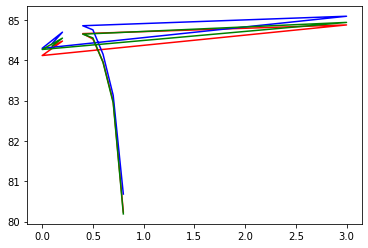

In [19]:
xb = [0.1,0.2,0,3,0.4,0.5,0.6,0.7,0.8]
a1=[]
r1=[]
p1=[]
f1=[]
for i in range(1,10):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = i/10,random_state = 1)
    st_x = StandardScaler()
    x_train3 = st_x.fit_transform(x_train)
    x_test3 = st_x.fit_transform(x_test)
    svn = SVC(kernel = 'linear',random_state = 0)
    svn.fit(x_train3,y_train)
    y_predict1 = svn.predict(x_test3)
    s1 = accuracy_score(y_test,y_predict1)*100
    s2 = recall_score(y_test,y_predict1,average = 'macro')*100
    s3 = precision_score(y_test,y_predict1,average = 'macro')*100
    a1.append(s1)
    p1.append(s3)
    r1.append(s2)
plt.plot(xb,a1,color='red')
plt.plot(xb,p1,color='blue')
plt.plot(xb,r1,color='green')

### Decision Tree

In [20]:
st_x = StandardScaler()
x_train1 = st_x.fit_transform(x_train)
x_test1 = st_x.fit_transform(x_test)
tree = DecisionTreeClassifier()
tree = tree.fit(x_train1,y_train)
y_pred = tree.predict(x_test1)
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred))
d11 = accuracy_score(y_test,y_pred)*100
d22 = recall_score(y_test,y_pred,average='macro')*100
d33 = precision_score(y_test,y_pred,average='macro')*100
d44 = f1_score(y_test,y_pred,average='macro')*100


Confusion Matrix
[[597   1   3   0   0   5   2   9   0   6  19   4  14   1   9   0   1   2
    2   0  10   3   1   9   8   0]
 [  6 488   0  24   6   7  16  22   7   6   0   0   2   0   4  18   3  39
   17   0   0  13   1   9   0   4]
 [  0   3 501   2  32   6  23   5   5   2   0   5   1   7  10   2   4   7
    5  17  16   4   1   1   5   0]
 [  2  36   0 479   0  14  18  49   3  22   3   1   0  57   5   3   3  10
    4   2   1   1   0   8   1   5]
 [  0   0   8   0 516   3  37   9   0   5  15   4   1   3   0   4  16   4
   17   6   4   1   0  11   0  30]
 [  1   7   0   9   1 497   0  13   8  17   2   1   0  15   0  45   0   5
   13  40   1   1   1   0  13   0]
 [  4   5  16   3  12   4 493  16  12   3   4  10   5  16   8  16  13   5
   10   1   9   1   4   0   0  30]
 [  0   5   4  18  12  18  18 439   3   6  21   4   1  23   9  10  13  19
   10   6   9   2   0   5   2   8]
 [  3   9   4   5   0  20  10   1 523  38   1   7   1   1   2   6   2   1
   17   0   0   0   0  13   4   6]
 [

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.86      0.85      0.85       706
           B       0.72      0.71      0.71       692
           C       0.84      0.75      0.80       664
           D       0.70      0.66      0.68       727
           E       0.67      0.74      0.71       694
           F       0.60      0.72      0.65       690
           G       0.63      0.70      0.66       700
           H       0.52      0.66      0.58       665
           I       0.87      0.78      0.82       674
           J       0.69      0.82      0.75       662
           K       0.66      0.59      0.62       664
           L       0.79      0.80      0.80       685
           M       0.84      0.81      0.83       700
           N       0.60      0.75      0.67       700
           O       0.75      0.53      0.62       697
           P       0.69      0.75      0.72       717
           Q       0.75      0.60      0.67       711
           R       0.68    

In [22]:
print("Accuracy :",d11)
print("Recall:",d22)
print("Precision_Score:",d33)
print("F1_Score:",d44)

Accuracy : 71.82777777777778
Recall: 71.84997643695361
Precision_Score: 72.60867076435538
F1_Score: 71.917569184848


In [23]:
predicted5= tree.predict([[2,8,3,5,1,8,0,0,6,6,10,8,0,8,0,9]])
print(predicted5)
predicted6= tree.predict([[2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8]])
print(predicted6)

['O']
['K']


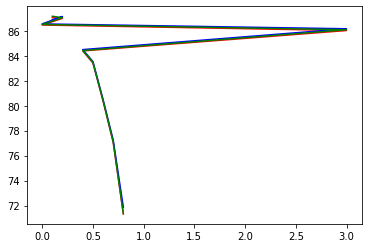

In [24]:
xd = [0.1,0.2,0,3,0.4,0.5,0.6,0.7,0.8]
a2=[]
r2=[]
p2=[]
f2=[]
for i in range(1,10):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = i/10,random_state = 1)
    st_x = StandardScaler()
    x_train1 = st_x.fit_transform(x_train)
    x_test1 = st_x.fit_transform(x_test)
    tree = DecisionTreeClassifier()
    tree = tree.fit(x_train1,y_train)
    y_pred = tree.predict(x_test1)
    d1 = accuracy_score(y_test,y_pred)*100
    d2 = recall_score(y_test,y_pred,average='macro')*100
    d3 = precision_score(y_test,y_pred,average='macro')*100
    d4 = f1_score(y_test,y_pred,average='macro')*100
    a2.append(d1)
    p2.append(d3)
    r2.append(d2)
    f2.append(d4)
    
plt.plot(xd,a2,color='red')
plt.plot(xd,p2,color='blue')
plt.plot(xd,r2,color='green')

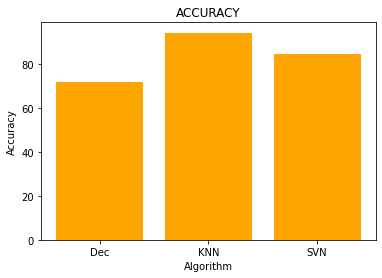

In [25]:
Class = ["Dec","KNN","SVN"]
Acc = [d11,k11,s11]
plt.bar(Class,Acc,color='orange')
plt.title("ACCURACY")
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.show()

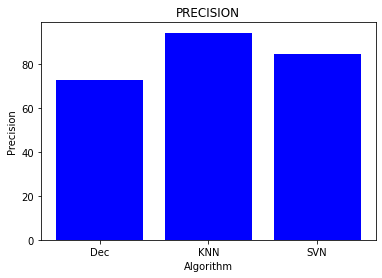

In [26]:
Class1 = ["Dec","KNN","SVN"]
pre = [d33,k33,s33]
plt.bar(Class1,pre,color='blue')
plt.title("PRECISION")
plt.xlabel("Algorithm")
plt.ylabel("Precision")
plt.show()

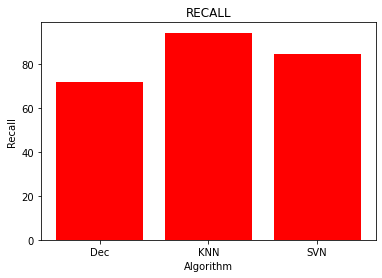

In [27]:
Class2 = ["Dec","KNN","SVN"]
re = [d22,k22,s22]
plt.bar(Class2,re,color='red')
plt.title("RECALL")
plt.xlabel("Algorithm")
plt.ylabel("Recall")
plt.show()